In [2]:
import symforce

symforce.set_backend("sympy")
symforce.set_log_level("warning")
from symforce.notebook_util import display, print_expression_tree

from symforce import sympy as sm

In [3]:
x = sm.Symbol("x")
y = sm.Symbol("y")

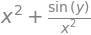

In [4]:
expr = x ** 2 + sm.sin(y) / x ** 2
display(expr)

In [5]:
print_expression_tree(expr)

Add: x**2 + sin(y)/x**2
+-Pow: x**2
| +-Symbol: x
| +-Integer: 2
+-Mul: sin(y)/x**2
  +-Pow: x**(-2)
  | +-Symbol: x
  | +-Integer: -2
  +-sin: sin(y)
    +-Symbol: y


In [6]:
display(expr.subs({x: 1.2, y: 0.4}))

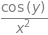

In [7]:
display(expr.diff(y))

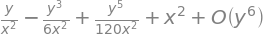

In [8]:
display(sm.series(expr, y))